<a href="https://colab.research.google.com/github/abhranil-datascience/DeepLearning/blob/ImageAnalytics/Day5_UnderstandingGANwithMNISTdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###################################################### Root Imports ############################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
adam_opt=Adam(lr=0.0002, beta_1=0.5)

Using TensorFlow backend.


In [2]:
#################################################### Load MNIST Dataset ##########################################################
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5)/127.5
x_train = x_train.reshape((x_train.shape[0],784))
x_test = (x_test.astype(np.float32) - 127.5)/127.5
x_train.shape,x_test.shape

((60000, 784), (10000, 28, 28))

In [3]:
count={}
for item in y_train:
  if item not in count:
    count[item]=1
  else:
    count[item]=count[item]+1
count

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [4]:
Zero=[index for index in range(0,len(y_train)) if y_train[index]==0]
One=[index for index in range(0,len(y_train)) if y_train[index]==1]
Two=[index for index in range(0,len(y_train)) if y_train[index]==2]
Three=[index for index in range(0,len(y_train)) if y_train[index]==3]
Four=[index for index in range(0,len(y_train)) if y_train[index]==4]
Five=[index for index in range(0,len(y_train)) if y_train[index]==5]
Six=[index for index in range(0,len(y_train)) if y_train[index]==6]
Seven=[index for index in range(0,len(y_train)) if y_train[index]==7]
Eight=[index for index in range(0,len(y_train)) if y_train[index]==8]
Nine=[index for index in range(0,len(y_train)) if y_train[index]==9]
Zero=Zero[0:5421]
One=One[0:5421]
Two=Two[0:5421]
Three=Three[0:5421]
Four=Four[0:5421]
Five=Five[0:5421]
Six=Six[0:5421]
Seven=Seven[0:5421]
Eight=Eight[0:5421]
Nine=Nine[0:5421]
Indexes=Zero+One+Two+Three+Four+Five+Six+Seven+Eight+Nine
random.shuffle(Indexes)
x_train=x_train[Indexes,:]
x_train.shape


(54210, 784)

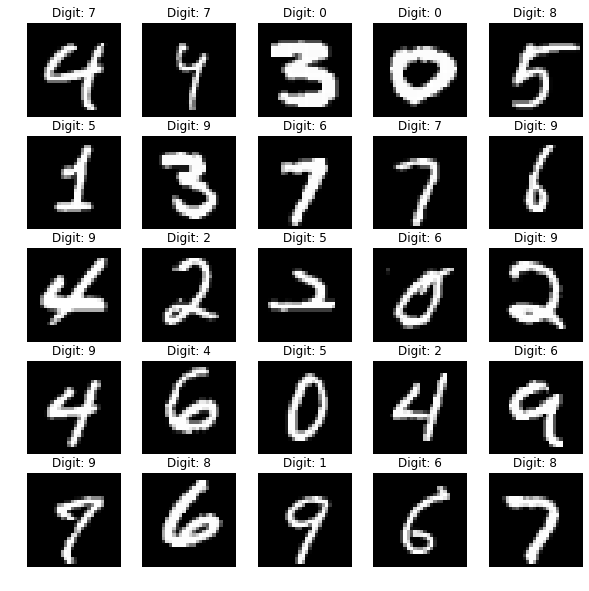

In [5]:
##################################################### View Some Images ###########################################################
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ImagesToBeViewed=[]
for indexes in range(0,25):
  ImagesToBeViewed.append(random.randint(0,x_train.shape[0]))
fig=plt.figure(figsize=(10,10))
columns=5
rows=5
for index in range(0,len(ImagesToBeViewed)):
  img=x_train[ImagesToBeViewed[index]]
  img=img.reshape((28,28))
  fig.add_subplot(rows, columns, index+1)
  imgplot = plt.imshow(img,cmap='gray',interpolation='none')
  plt.title("Digit: {}".format(y_train[ImagesToBeViewed[index]]))
  plt.axis('off')
plt.show()


In [6]:
############################################## Create the generator ##############################################
def create_gen():
  generator=Sequential()
  generator.add(Dense(units=256,input_shape=(100,)))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=512))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=1024))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=784,activation='tanh'))
  generator.compile(optimizer=adam_opt,loss='binary_crossentropy')
  return generator
g=create_gen()
g.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [7]:
###################################### Create the Discriminator ###################################################
def create_disc():
  discriminator=Sequential()
  discriminator.add(Dense(units=1024,input_shape=(784,)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(units=512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(units=256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.2))
  discriminator.add(Dense(units=1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=adam_opt)
  return discriminator
d=create_disc()
d.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
____

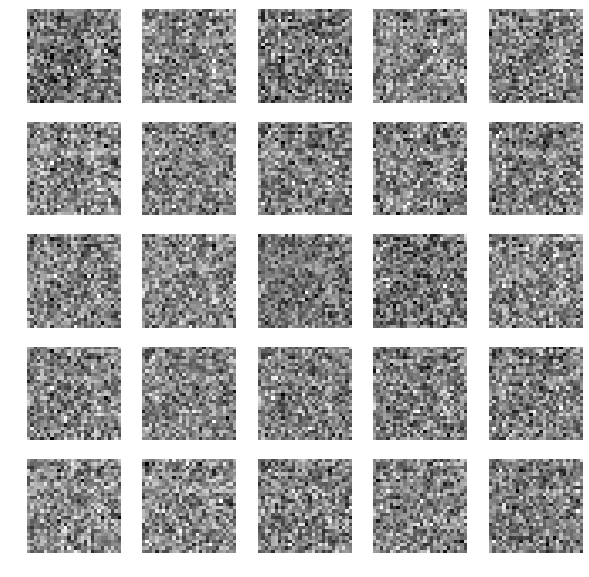

In [8]:
############################################# Generate Sample Images using Untrained Generator model ####################################################
noise= np.random.normal(loc=0, scale=1, size=[25, 100])
gen=create_gen()
generated_images = gen.predict(noise)
fig=plt.figure(figsize=(10,10))
columns=5
rows=5
for index in range(0,generated_images.shape[0]):
  img=generated_images[index]
  img=img.reshape((28,28))
  fig.add_subplot(rows, columns, index+1)
  imgplot = plt.imshow(img,cmap='gray',interpolation='none')
  plt.axis('off')
plt.show()

In [9]:
######################################## Create GAN #################################################################
def create_gan(discriminator,generator):
  discriminator.trainable=False
  gan_input=Input(shape=(100,))
  x=generator(gan_input)
  gan_output=discriminator(x)
  gan=Model(gan_input,gan_output)
  gan.compile(optimizer='adam',loss='binary_crossentropy')
  return gan
gan=create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


Epoch: 1


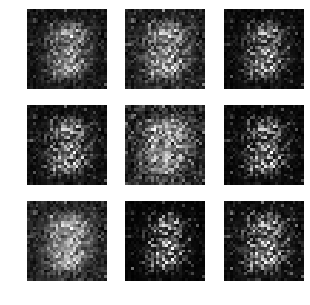

Epoch: 10


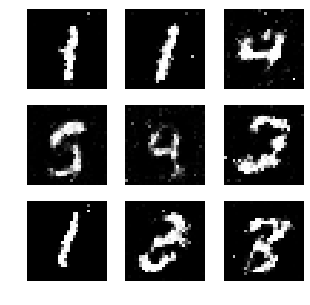

Epoch: 20


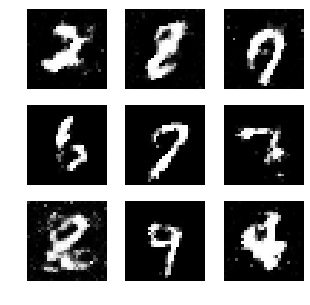

Epoch: 30


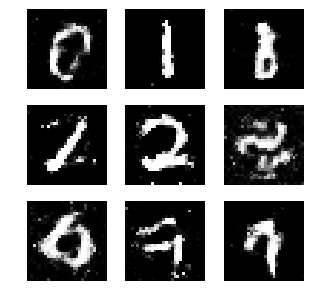

Epoch: 40


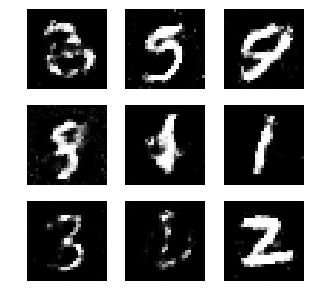

Epoch: 50


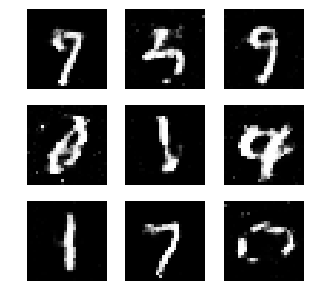

Epoch: 60


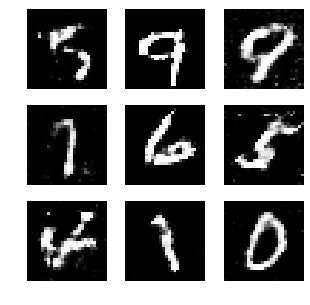

Epoch: 70


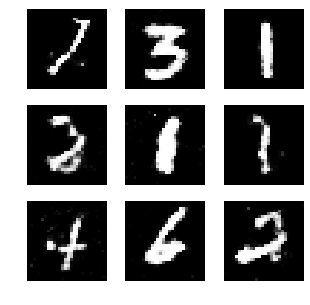

Epoch: 80


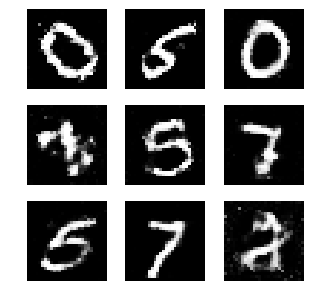

Epoch: 90


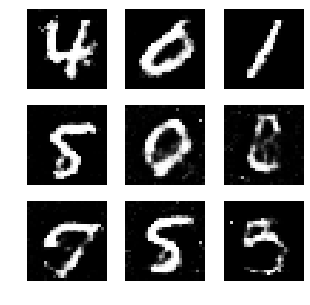

Epoch: 100


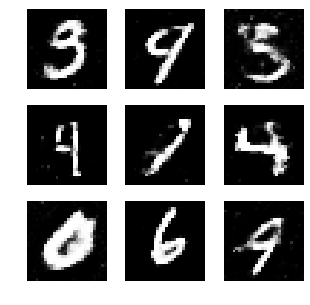

Epoch: 110


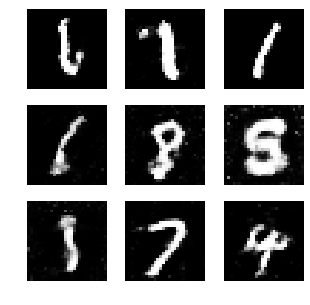

Epoch: 120


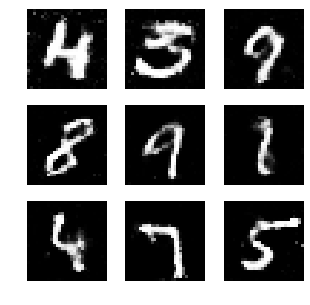

Epoch: 130


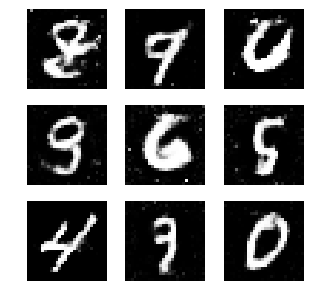

Epoch: 140


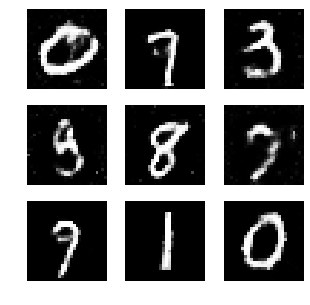

Epoch: 150


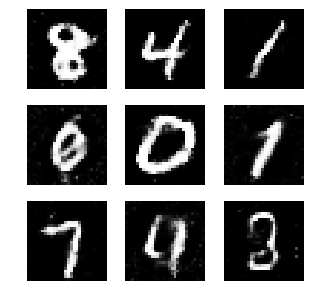

Epoch: 160


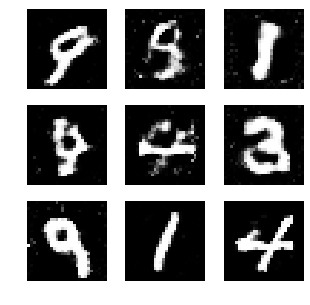

Epoch: 170


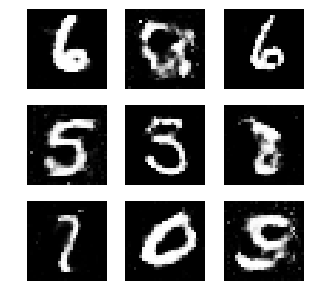

Epoch: 180


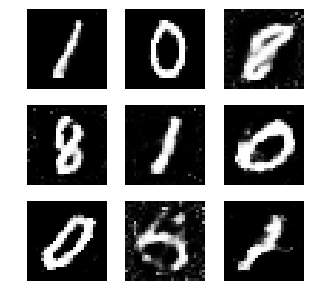

Epoch: 190


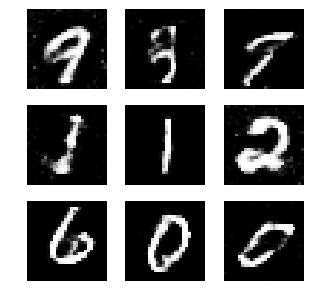

Epoch: 200


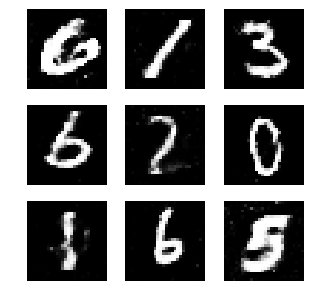

Epoch: 210


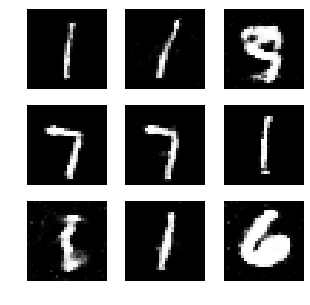

Epoch: 220


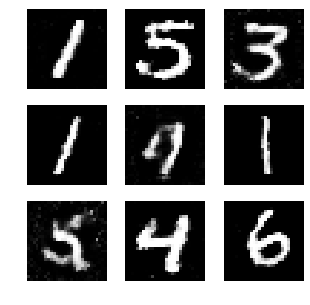

Epoch: 230


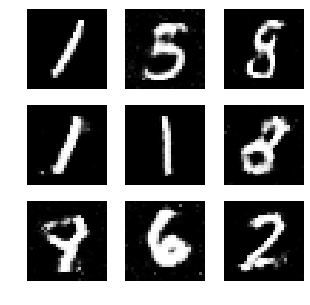

Epoch: 240


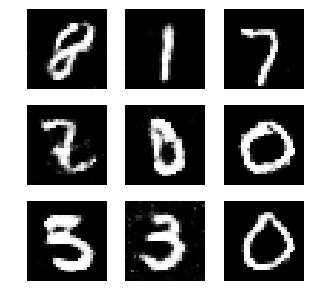

Epoch: 250


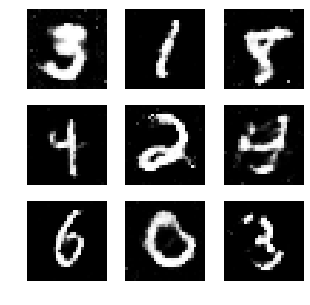

Epoch: 260


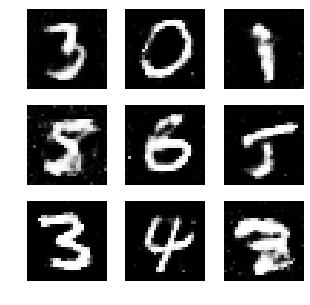

Epoch: 270


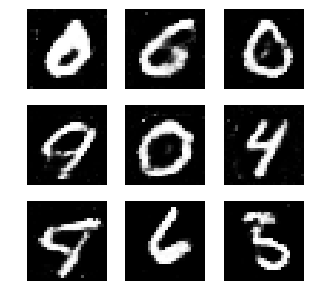

Epoch: 280


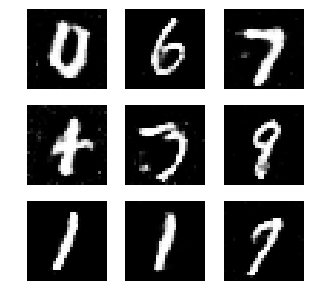

Epoch: 290


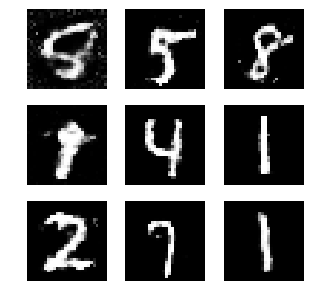

Epoch: 300


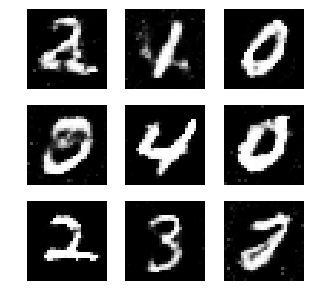

Epoch: 310


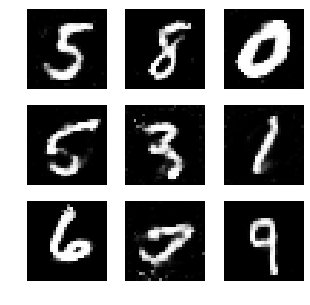

Epoch: 320


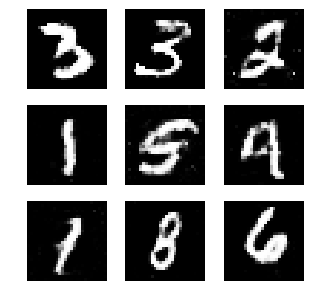

Epoch: 330


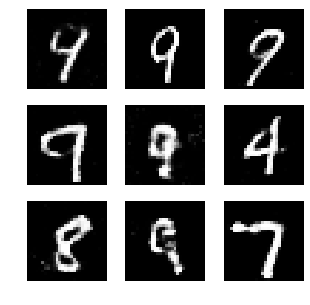

Epoch: 340


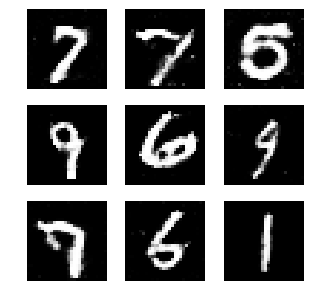

Epoch: 350


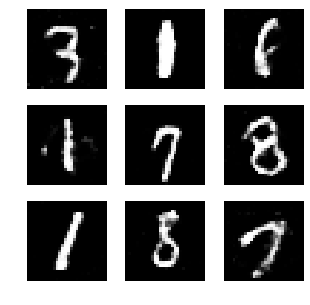

Epoch: 360


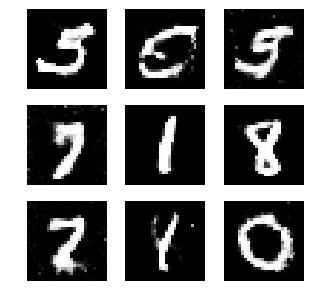

Epoch: 370


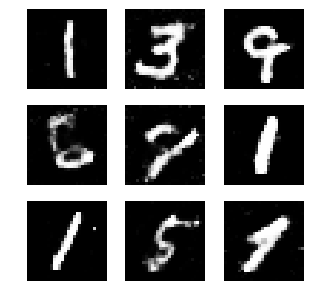

Epoch: 380


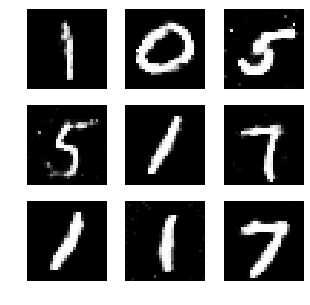

Epoch: 390


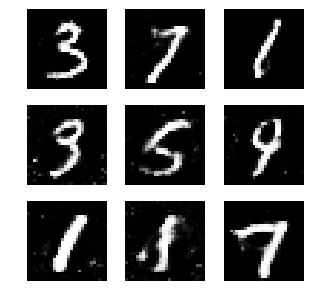

Epoch: 400


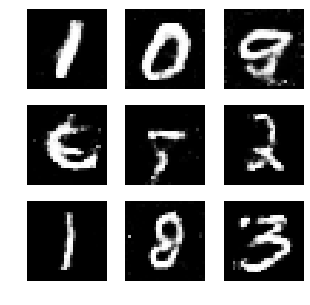

Epoch: 410


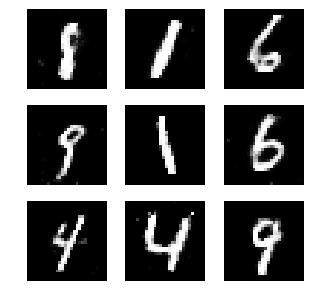

Epoch: 420


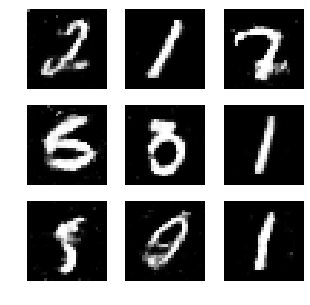

Epoch: 430


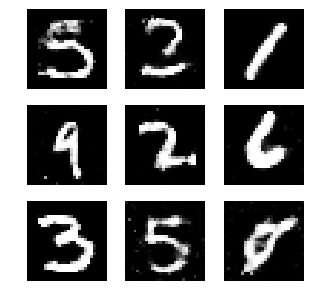

Epoch: 440


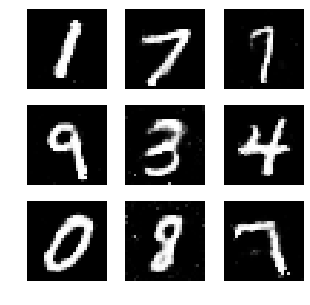

Epoch: 450


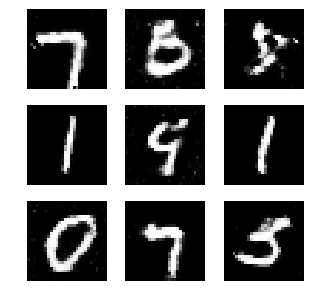

Epoch: 460


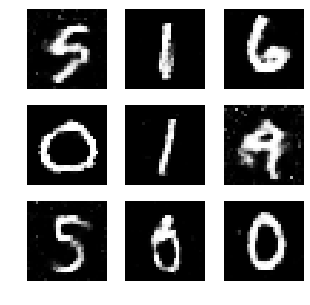

Epoch: 470


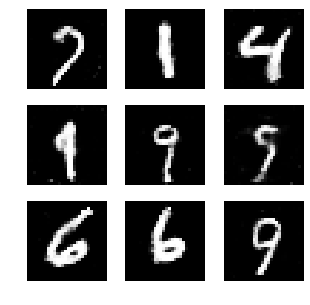

Epoch: 480


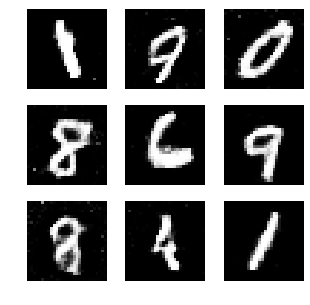

Epoch: 490


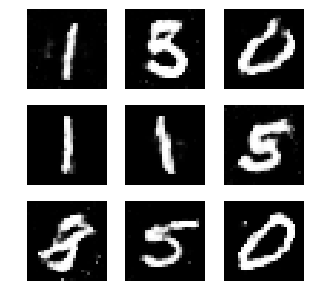

Epoch: 500


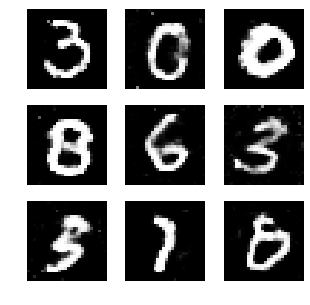

In [10]:
def training_gan(epochs,batch_size):
  batch_count = x_train.shape[0] / batch_size
  generator= create_gen()
  discriminator= create_disc()
  gan = create_gan(discriminator, generator)
  for e in range(1,epochs+1):
    for count in range(int(batch_count)):
      ######################### generate random noise as input ##########################
      noise=np.random.normal(loc=0, scale=1, size=[batch_size, 100])
      ######################### generate fake random images #############################
      gen_images_batch=generator.predict(noise)
      #print(str(gen_images_batch[5].shape))
      ######################### get random set of real images ###########################
      real_images_batch=x_train[np.random.randint(low=0,high=x_train.shape[0],size=batch_size)]
      #print(str(real_images_batch[5].shape))
      ######################## construct batch of real and fake data ####################
      Image_batch=np.concatenate([real_images_batch,gen_images_batch])
      ######################## construct labels of real and fake data ####################
      Image_Labels=np.zeros(2*batch_size) 
      Image_Labels[:batch_size]=0.9 ## real image label is 0.9 and fake image label is 0
      #print(str(Image_Labels))
      ############# Train Discriminator on this image set before starting gan training ####
      discriminator.trainable=True
      discriminator.train_on_batch(Image_batch,Image_Labels)
      ######## Now since the discriminator has been trained so we will not train discriminator again ###########
      discriminator.trainable=False
      
      """
      ################## Check if Discriminator has been trained well #####################
      fake_pred_disc=discriminator.predict(gen_images_batch)
      real_pred_disc=discriminator.predict(real_images_batch)
      print("Discriminator Prediction at batch count: "+str(count+1)+"|| Fake Image: "+str(fake_pred_disc)+" || Real Image: "+str(real_pred_disc))"""
      
      ############################## Creating Target Labels for GAN ########################
      noise=np.random.normal(0,1, [batch_size, 100])
      GAN_Image_Labels=np.ones(batch_size)
      ################# Keeping discriminator off we will train generator ##################
      gan.train_on_batch(noise,GAN_Image_Labels)
      ################# Predict new images using Generator #################################
    if e==1 or e % 10==0:
      print("Epoch: "+str(e))
      noise=np.random.normal(loc=0, scale=1, size=[9, 100])
      gen_images_batch=generator.predict(noise)
      fig=plt.figure(figsize=(5,5))
      columns=3
      rows=3
      for index in range(0,gen_images_batch.shape[0]):
        img=gen_images_batch[index]
        img=img.reshape((28,28))
        fig.add_subplot(rows, columns, index+1)
        imgplot = plt.imshow(img,cmap='gray')
        plt.axis('off')
      plt.show()
training_gan(epochs=500,batch_size=128)        